# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

from iminuit import Minuit
import sys
from scipy import stats
from iminuit import cost

In [3]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'
filename = 'pend_t_raw.csv'

## Data reader

In [4]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter=',', names=('NO','EXP1','EXP2','EXP3','EXP4'), skip_header=1)
    return dat

## Read and plot the data

In [5]:
data = read_data(filename)
n, t1, t2, t3, t4 = data['NO'], data['EXP1'], data['EXP2'], data['EXP3'], data['EXP4']
print(n)
x = np.linspace(0, 10, 1000) 

def linreg(x, a, b):
    return a*x + b


par1, cov1 = curve_fit(linreg, n, t1, sigma=np.ones_like(t1)*0.005, absolute_sigma = True)
par2, cov2 = curve_fit(linreg, n, t2, sigma=np.ones_like(t2)*0.005, absolute_sigma = True)
par3, cov3 = curve_fit(linreg, n, t3, sigma=np.ones_like(t3)*0.005, absolute_sigma = True)
par4, cov4 = curve_fit(linreg, n, t4, sigma=np.ones_like(t4)*0.005, absolute_sigma = True)

residuals1 = t1 - linreg(n, *par1)
residuals2 = t2 - linreg(n, *par2)
residuals3 = t3 - linreg(n, *par3)
residuals4 = t4 - linreg(n, *par4)

sig_t1 = np.std(residuals1)
sig_t2 = np.std(residuals2)
sig_t3 = np.std(residuals3)
sig_t4 = np.std(residuals4)

par1, cov1 = curve_fit(linreg, n, t1, sigma=np.ones_like(t1)*sig_t1, absolute_sigma = True)
par2, cov2 = curve_fit(linreg, n, t2, sigma=np.ones_like(t2)*sig_t2, absolute_sigma = True)
par3, cov3 = curve_fit(linreg, n, t3, sigma=np.ones_like(t3)*sig_t3, absolute_sigma = True)
par4, cov4 = curve_fit(linreg, n, t4, sigma=np.ones_like(t4)*sig_t4, absolute_sigma = True)

par_uncert1 = np.sqrt(np.diagonal(cov1))
par_uncert2 = np.sqrt(np.diagonal(cov2))
par_uncert3 = np.sqrt(np.diagonal(cov3))
par_uncert4 = np.sqrt(np.diagonal(cov4))

np.savetxt('pend_t_uncert.csv', np.column_stack((sig_t1, sig_t2, sig_t3, sig_t4)), delimiter=',', header='EXP1,EXP2,EXP3,EXP4', comments='')

y1 = linreg(n, *par1)
y2 = linreg(n, *par2)
y3 = linreg(n, *par3)
y4 = linreg(n, *par4)


cfit1 = cost.LeastSquares(n, t1, sig_t1, linreg)
cfit2 = cost.LeastSquares(n, t2, sig_t2, linreg)
cfit3 = cost.LeastSquares(n, t3, sig_t3, linreg)
cfit4 = cost.LeastSquares(n, t4, sig_t4, linreg)

mfit1 = Minuit(cfit1, a=par1[0], b=par1[1])
mfit2 = Minuit(cfit2, a=par2[0], b=par2[1])
mfit3 = Minuit(cfit3, a=par3[0], b=par3[1])
mfit4 = Minuit(cfit4, a=par4[0], b=par4[1])

mfit1.migrad() 


[0. 1. 2. 3. 4. 5. 6.]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7 (χ²/ndof = 1.4)          │              Nfcn = 20               │
│ EDM = 4.56e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.144   │   0.034   │            │            │         │         │       │
│ 1 │ b    │   -0.18   │   0.12    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00118 -0.0036 │
│ b │ -0.0036  0.0154 │
└───┴─────────────────┘

In [16]:
mfit2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7 (χ²/ndof = 1.4)          │              Nfcn = 20               │
│ EDM = 1.89e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.362   │   0.014   │            │            │         │         │       │
│ 1 │ b    │   -0.05   │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000184 -0.55e-3 │
│ b │ -0.55e-3  0.00239 │
└───┴───────────────────┘

In [17]:
mfit3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7 (χ²/ndof = 1.4)          │              Nfcn = 31               │
│ EDM = 2.35e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   7.973   │   0.014   │            │            │         │         │       │
│ 1 │ b    │   -0.10   │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000193 -0.58e-3 │
│ b │ -0.58e-3  0.00251 │
└───┴───────────────────┘

In [18]:
mfit4.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7 (χ²/ndof = 1.4)          │              Nfcn = 26               │
│ EDM = 1.08e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.392   │   0.009   │            │            │         │         │       │
│ 1 │ b    │  -0.058   │   0.032   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 7.81e-05 -0.23e-3 │
│ b │ -0.23e-3  0.00102 │
└───┴───────────────────┘

In [19]:
chi2_value1 = mfit1.fval 
chi2_value2 = mfit2.fval
chi2_value3 = mfit3.fval
chi2_value4 = mfit4.fval

# Get number of degrees-of-freedom (Ndof):
N = len(n)

Ndof_value1 = N - mfit1.nfit
Ndof_value2 = N - mfit2.nfit
Ndof_value3 = N - mfit3.nfit
Ndof_value4 = N - mfit4.nfit

Prob_value1 = stats.chi2.sf(chi2_value1, Ndof_value1)
Prob_value2 = stats.chi2.sf(chi2_value2, Ndof_value2)
Prob_value3 = stats.chi2.sf(chi2_value3, Ndof_value3)
Prob_value4 = stats.chi2.sf(chi2_value4, Ndof_value4)

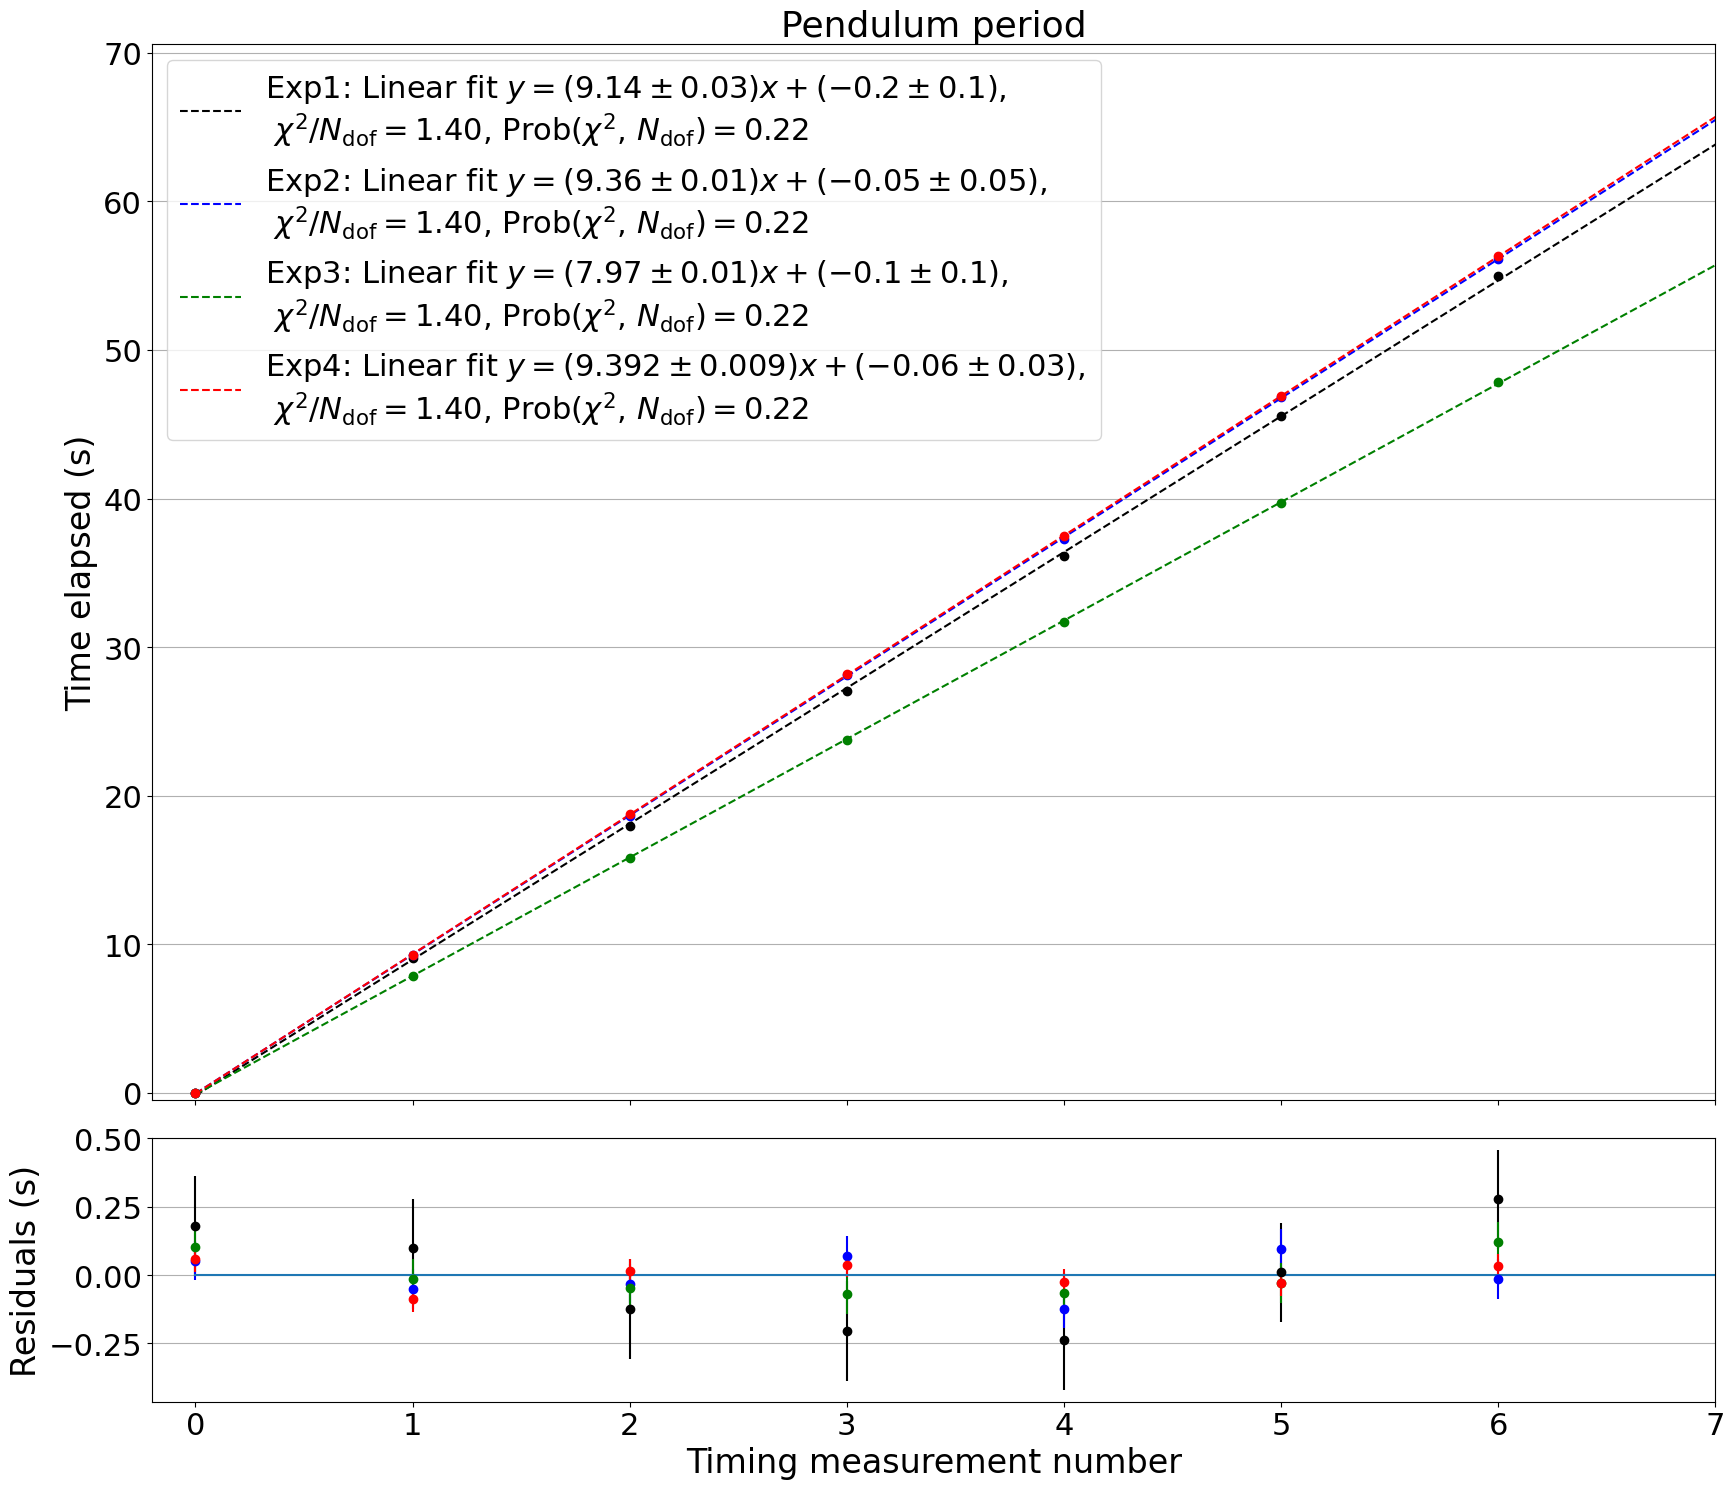

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(17, 15), gridspec_kw={'height_ratios':[4,1]}, sharex=True)

ax[0].errorbar(n, t1, yerr=sig_t1, color='k', fmt='o')
ax[0].errorbar(n, t2, yerr=sig_t2, color='b', fmt='o')
ax[0].errorbar(n, t3, yerr=sig_t3, color='g', fmt='o')
ax[0].errorbar(n, t4, yerr=sig_t4, color='r', fmt='o')

ax[0].set_ylabel('Time elapsed (s)', fontsize=24)

ax[0].set(xlim=(-0.2, n[-1]+np.ediff1d(n)[0]), ylim=(-0.5, t4[-1]+np.ediff1d(t4)[0]+5))

ax[0].plot(x, linreg(x, *par1), 'k--', label=f'Exp1: Linear fit $y = ({par1[0]:.2f} \\pm {par_uncert1[0]:0.2f})x + ({par1[1]:.1f} \\pm {par_uncert1[1]:0.1f})$, \n $\\chi^2 / N_\\mathrm{{dof}} = {chi2_value1/Ndof_value1:0.2f}$, Prob($\\chi^2$, $N_\\mathrm{{dof}}) = {Prob_value1:.2f}$')
ax[0].plot(x, linreg(x, *par2), 'b--', label=f'Exp2: Linear fit $y = ({par2[0]:.2f} \\pm {par_uncert2[0]:0.2f})x + ({par2[1]:.2f} \\pm {par_uncert2[1]:0.2f})$, \n $\\chi^2 / N_\\mathrm{{dof}} = {chi2_value2/Ndof_value2:0.2f}$, Prob($\\chi^2$, $N_\\mathrm{{dof}}) = {Prob_value2:.2f}$')
ax[0].plot(x, linreg(x, *par3), 'g--', label=f'Exp3: Linear fit $y = ({par3[0]:.2f} \\pm {par_uncert3[0]:0.2f})x + ({par3[1]:.1f} \\pm {par_uncert3[1]:0.1f})$, \n $\\chi^2 / N_\\mathrm{{dof}} = {chi2_value3/Ndof_value3:0.2f}$, Prob($\\chi^2$, $N_\\mathrm{{dof}}) = {Prob_value3:.2f}$')
ax[0].plot(x, linreg(x, *par4), 'r--', label=f'Exp4: Linear fit $y = ({par4[0]:.3f} \\pm {par_uncert4[0]:0.3f})x + ({par4[1]:.2f} \\pm {par_uncert4[1]:0.2f})$, \n $\\chi^2 / N_\\mathrm{{dof}} = {chi2_value4/Ndof_value4:0.2f}$, Prob($\\chi^2$, $N_\\mathrm{{dof}}) = {Prob_value4:.2f}$')

ax[0].tick_params(axis='both', which='major', labelsize=22)

ax[0].grid(axis='y')
ax[0].legend(fontsize=22)

ax[0].set_title('Pendulum period', fontsize=26)

ax[1].errorbar(n, residuals1, color='k', yerr=sig_t1, fmt='o')
ax[1].errorbar(n, residuals2, color='b', yerr=sig_t2, fmt='o')
ax[1].errorbar(n, residuals3, color='g', yerr=sig_t3, fmt='o')
ax[1].errorbar(n, residuals4, color='r', yerr=sig_t4, fmt='o')

ax[1].plot(x, np.zeros_like(x))

ax[1].set_xlabel('Timing measurement number', fontsize=24)
ax[1].set_ylabel('Residuals (s)', fontsize=24)

ax[1].tick_params(axis='both', which='major', labelsize=22)

ax[1].grid(axis='y')

plt.tight_layout()
plt.savefig('pend_t_fit.png')

In [ ]:
def Chauvenets(Lengths):

    #Calculate p-values and t-values
    t_sus = (Lengths - Lengths.mean())/Lengths.std(ddof = 1)

    print(t_sus)

    # Use stats.norm.cdf, pass the absolute t value. 
    prob_of_inside_gaussian = stats.norm.cdf( Lengths.mean() + (Lengths.std(ddof = 1))*abs(t_sus),
                                             loc = Lengths.mean(),scale = Lengths.std(ddof = 1)) - stats.norm.cdf( Lengths.mean() - (Lengths.std(ddof = 1))*abs(t_sus),loc = Lengths.mean(),scale = Lengths.std(ddof = 1))

    prob_of_outside_gaussian = 1 - prob_of_inside_gaussian
    print(prob_of_outside_gaussian)

    # Initialize new matrix by deleting the smallest p value (we assume lowest p-value is under 0.5)
    if min(prob_of_outside_gaussian) < 0.5:
        new_lengths = np.delete(Lengths.copy(), np.where(prob_of_outside_gaussian == min(prob_of_outside_gaussian)))

    # Run loop that takes care of the rest of the p-values, 
    # re-initializing the matrix of lengths each time, calculating new means and std's
    while min(prob_of_outside_gaussian) < 0.5:
    
        t_sus = (new_lengths - new_lengths.mean())/new_lengths.std(ddof = 1)

        prob_of_inside_gaussian = stats.norm.cdf(new_lengths.mean() + (new_lengths.std(ddof = 1))*abs(t_sus), loc = new_lengths.mean(),scale = new_lengths.std(ddof = 1)) - stats.norm.cdf(new_lengths.mean() - (new_lengths.std(ddof = 1))*abs(t_sus),loc = new_lengths.mean(),scale = new_lengths.std(ddof = 1))

        prob_of_outside_gaussian = 1 - prob_of_inside_gaussian
        print(prob_of_outside_gaussian)
        
        # now initialize new matrix by deleting the smallest p value (we assume lowest p-value is under 0.5)
        if min(prob_of_outside_gaussian) < 0.5:
            new_lengths = np.delete(new_lengths, np.where(prob_of_outside_gaussian == min(prob_of_outside_gaussian)))

    return new_lengths

In [32]:
pars = np.array([par1[0], par2[0], par3[0], par4[0]])
print(pars)

pars_chauv = Chauvenets(pars)
print(pars_chauv)

[9.14401071 9.36242142 7.97321784 9.39228211]
[ 0.26181044  0.58665824 -1.47953947  0.6310708 ]
[0.79346759 0.55743326 0.13899619 0.52799423]
[0.25110316 0.64287273 0.49398273]
[0.47950012 0.47950012]
[]


C:\Users\cjuel\AppData\Local\Temp\ipykernel_26540\467926847.py:23: RuntimeWarning: Mean of empty slice.
  t_sus = (new_lengths - new_lengths.mean())/new_lengths.std(ddof = 1)
c:\Users\cjuel\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\cjuel\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\cjuel\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\cjuel\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\cjuel\AppData\Local\Temp\ipykernel_26540\467926847.py:25: RuntimeWarning: Mean of empty slice.
  prob_of_inside_gaussian = s

ValueError: min() iterable argument is empty

In [ ]:
t_sus = (par3[0]-np.mean(pars))/np.std(pars)
print(t_sus)

prob_in = stats.norm.cdf(np.mean(pars) + np.std(pars)*abs(t_sus), loc=np.mean(pars), scale=np.std(pars)) - stats.norm.cdf(np.mean(pars) - np.std(pars)*abs(t_sus), loc=np.mean(pars), scale=np.std(pars))

prob_out = 1 - prob_in  

print(prob_in)
print(prob_out)

-1.7084250276976038
0.9124424933861488
0.0875575066138512


In [ ]:
ts = np.array((np.mean(t1), np.mean(t2), np.mean(t3), np.mean(t4)))

print(ts)

ts_chauv = Chauvenets(ts)
print(ts_chauv)


[27.25188571 28.03414286 23.81638571 28.11862857]
[0.82589782 0.54502449 0.1410099  0.517734  ]
[0.25006948 0.62647315 0.5070208 ]
[0.47950012 0.47950012]
[nan]
[28.11862857]


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.